# CPU Performance

About the dataset:




Title: Relative CPU Performance Data
Number of Instances: 209
Number of Attributes: 6 predictive attributes
                      

Attribute Information:

1. MMIN: minimum main memory in kilobytes (integer)
2. MMAX: maximum main memory in kilobytes (integer)
3. CACH: cache memory in kilobytes (integer)
4. CHMIN: minimum channels in units (integer)
5. CHMAX: maximum channels in units (integer)
6. PRP: published relative performance (integer)

Missing Attribute Values: None

Class field: PRP

# Importing all required libraries

In [107]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

#Importing libraries for handling table-like data and matrices
import numpy as np
import pandas as pd

#Importing Modelling Algorithm libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

#Importing Visualisation libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Importing and understanding our dataset


In [108]:
dataset = pd.read_excel("CPU_Data.xlsx")

In [109]:
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [110]:
dataset.head() #shows the first five rows

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,125,256,6000,256,16,128,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,8000,32000,32,8,32,269,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29,8000,32000,32,8,32,220,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,8000,32000,32,8,32,172,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29,8000,16000,32,8,16,132,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verifying it as a 'dataframe' object in pandas

In [111]:
type(dataset)

pandas.core.frame.DataFrame

Shape of dataset

In [112]:
dataset.shape

(209, 26)

In [113]:
dataset=dataset.iloc[:,0:7]

Printing out a header columns

In [114]:
dataset.head(5)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [115]:
dataset.sample(5)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
118,25,2000,12000,8,1,4,49
80,330,1000,3000,0,2,4,16
63,75,2000,8000,64,1,38,144
18,143,1000,2000,0,5,16,31
159,56,1000,4000,0,1,6,17


In [116]:
dataset.tail() #shows last five rows

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67
208,480,1000,4000,0,0,0,45


In [117]:
dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMIN    209 non-null    int64
 2   MMAX    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMIN   209 non-null    int64
 5   CHMAX   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


From the above we can see that there are 7 columns where are int


In [119]:
def describe_more(df):
    var = [];
    l = [];
    t = []
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable': var, 'Levels': l, 'Datatype': t})
    levels.sort_values(by='Levels', inplace=True)
    return levels

describe_more(dataset)

,Variable,Levels,Datatype
4,CHMIN,15,int64
3,CACH,22,int64
2,MMAX,23,int64
1,MMIN,25,int64
5,CHMAX,31,int64
0,MYCT,60,int64
6,PRP,116,int64


In [120]:
dataset.corr() #Correlation matrix to see the tentative dependencies between columns

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


In [121]:
dataset[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']].skew()

MYCT     2.544153
MMIN     3.515933
MMAX     2.140663
CACH     2.824777
CHMIN    4.027333
CHMAX    3.595905
PRP      3.892814
dtype: float64

In [122]:
dataset[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']].kurtosis()

MYCT      7.062767
MMIN     17.613275
MMAX      5.902471
CACH     10.278384
CHMIN    22.468899
CHMAX    15.888081
PRP      19.252187
dtype: float64

We can see that the dataset is highly Skewed, an optimal value for skewness should be -0.5 to 0.5 for a normalised data.
Inorder to unskew the data, there are various methods followed and one of the popular method is taking natural log.

Before we take log tarnsaformation to treat the skewness we need to check if we have any negative or zero values, if we have then we can add a constant to it then we can take log transaformation.

In [123]:
(dataset.loc[:,'MYCT':'PRP']).apply(lambda column: (column<= 0).sum()) 
#Checking for '0' values

MYCT      0
MMIN      0
MMAX      0
CACH     69
CHMIN     5
CHMAX     5
PRP       0
dtype: int64

Here we can see CACH,CHMIN,CHMAX columns has <=0 values so we can add constant to it then take log i.e log(x+1)

Before that, exploring Rows where CACH = 0, Because 69 rows containg zero is very high since our total number of rows = 209, that is here we can see 33% of the rows are '0' for CACH.

In [124]:
Cach_zero_rows = dataset.loc[dataset['CACH']== 0]

In [125]:
#Confirming the CACH == 0
Cach_zero_rows.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
10,400,1000,3000,0,1,2,38
14,350,64,64,0,1,4,10
15,200,512,16000,0,4,32,35
17,143,512,5000,0,7,32,28
18,143,1000,2000,0,5,16,31


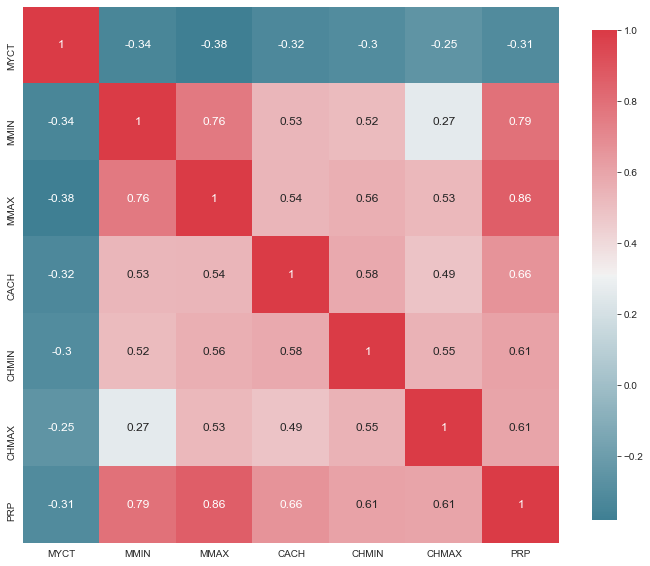

In [126]:
def plot_correlation_map(df):
    corr = dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )

    
#Corr plot for data to compare with the above
plot_correlation_map(dataset.loc[dataset['CACH']!= 0])

From the above Corr plot we can see the Dependent variable has 61% to 86% of correlation with the independent variables.
Note: 'correlation doesn't imply causation'


Now coming back to log transformation, adding constant '1' to the columns where it comtains values equal to '0'

In [127]:
dataset['CACH'] = dataset['CACH']+1
dataset['CHMIN'] = dataset['CHMIN']+1
dataset['CHMAX'] = dataset['CHMAX'] +1

In [128]:
(dataset[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]).apply(lambda column: (column<= 0).sum())

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
dtype: int64

Here we can see that now there aren't and <= 0 values in any columns, so now we can proceed with teh log transformation.

In [129]:
data_log = np.log(dataset[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']])

In [130]:
print('Before Log Transformed')
(dataset.iloc[:,2:].head(5))


Before Log Transformed


,MMAX,CACH,CHMIN,CHMAX,PRP
0,6000,257,17,129,198
1,32000,33,9,33,269
2,32000,33,9,33,220
3,32000,33,9,33,172
4,16000,33,9,17,132


In [131]:
print('After Log Transformed')
(data_log.head())

After Log Transformed


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,4.828314,5.545177,8.699515,5.549076,2.833213,4.859812,5.288267
1,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.594711
2,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.393628
3,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.147494
4,3.367296,8.987197,9.680344,3.496508,2.197225,2.833213,4.882802


In [132]:
data_log[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']].skew() #Checking skewness for the data_log

MYCT     0.397838
MMIN     0.036612
MMAX    -0.617669
CACH     0.042585
CHMIN    0.802618
CHMAX    0.136018
PRP      0.521715
dtype: float64

In [133]:
print("mean : ", np.mean(data_log[data_log.columns[2:]]))
print("var  : ", np.var(data_log[data_log.columns[2:]]))
print("skew : ",(data_log[data_log.columns[2:]]).skew())
print("kurt : ",(data_log[data_log.columns[2:]]).kurtosis())

mean :  MMAX     8.922222
CACH     2.075453
CHMIN    1.355234
CHMAX    2.407778
PRP      4.037242
dtype: float64
var  :  MMAX     1.060236
CACH     2.900684
CHMIN    0.645803
CHMAX    1.068150
PRP      1.093810
dtype: float64
skew :  MMAX    -0.617669
CACH     0.042585
CHMIN    0.802618
CHMAX    0.136018
PRP      0.521715
dtype: float64
kurt :  MMAX     1.487443
CACH    -1.336633
CHMIN   -0.004955
CHMAX   -0.053167
PRP     -0.034942
dtype: float64


In [134]:
data_log.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,4.746955,7.360234,8.922222,2.075453,1.355234,2.407778,4.037242
std,1.037887,1.103859,1.032150,1.707229,0.805548,1.035995,1.048365
min,2.833213,4.158883,4.158883,0.000000,0.000000,0.000000,1.791759
25%,3.912023,6.643790,8.294050,0.000000,0.693147,1.791759,3.295837
50%,4.700480,7.600902,8.987197,2.197225,1.098612,2.197225,3.912023
75%,5.416100,8.294050,9.680344,3.496508,1.945910,3.218876,4.727388
max,7.313220,10.373491,11.066638,5.549076,3.970292,5.176150,7.047517


In [135]:
#From data_transformed creating df & y dataframes for Independent & Dependent variables
df = data_log[data_log.columns[0:6]]
y = data_log[data_log.columns[-1:]]

0.8086124401913876


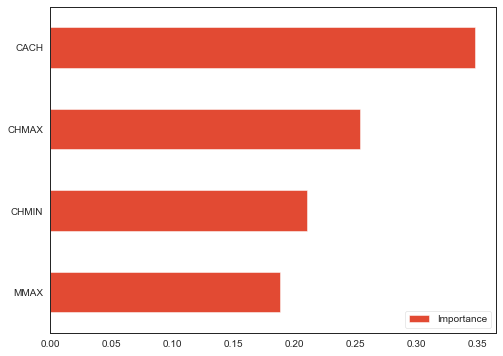

In [136]:
def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state=99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)
def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame(
        model.feature_importances_,
        columns=['Importance'],
        index=X.columns
    )
    imp = imp.sort_values(['Importance'], ascending=True)
    imp[: 10].plot(kind='barh')
    print(model.score(X, y))
    
plot_variable_importance(data_log[data_log.columns[2:-1]].astype('int'), y.astype('int'))

From the above we can see that CACH has the maximum variable importance and all these variables.


In [137]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df,y, test_size = 0.15, random_state = 42)

In [138]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (177, 6)
Training Labels Shape: (177, 1)
Testing Features Shape: (32, 6)
Testing Labels Shape: (32, 1)


## Using Randomforest Algorithm

In [139]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [140]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print(type(predictions), type(test_labels))
# Calculate the absolute errors
errors = ((predictions) - np.array(test_labels)) #Here converting the test_lables to 'np.array' to calculate the 'errors'
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
Mean Absolute Error: 0.03 .


In [141]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * ((errors / np.array(test_labels)))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.55 %.


The above seems to be good,but lets try other models too

## linear regression model

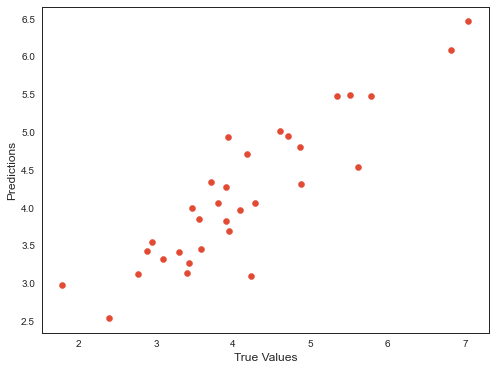

Score: 0.7972537774077142


In [142]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(train_features, train_labels)
predictions = lm.predict(test_features)
## The line / model
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print ('Score:', model.score(test_features, test_labels))


Here we can see that linear method got us 79% accuracy not bad but comparing to RF its poor.

## GradientBoosting Regressor

Score: 0.8722073880273656


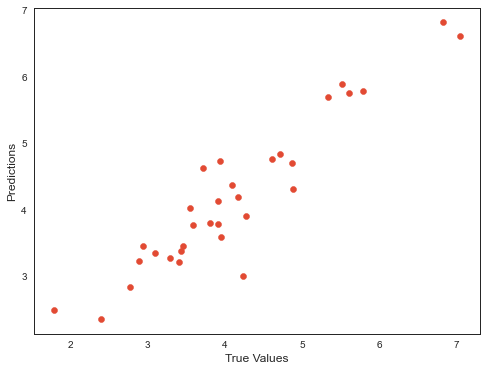

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(train_features, train_labels)
model.score(test_features,test_labels)
print ('Score:', model.score(test_features, test_labels))
predictions = model.predict(test_features)
## The line / model
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## AdaBoostRegressor

Score: 0.8413896819070931


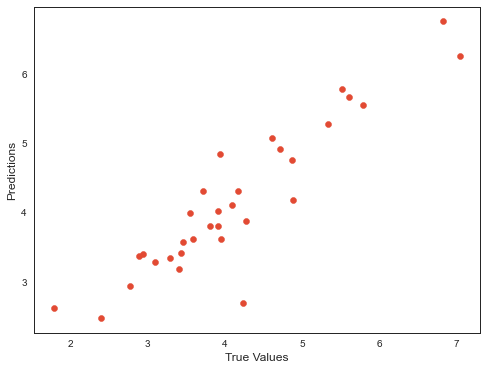

In [144]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(train_features , train_labels)
model.score(test_features,test_labels)
print ('Score:', model.score(test_features, test_labels))
predictions = model.predict(test_features)
## The line / model
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## BaggingRegressor

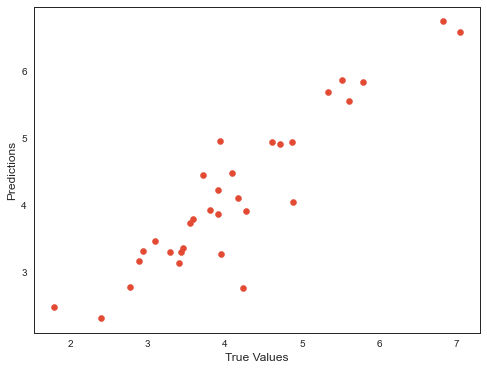

Score: 0.8403086279316951


In [145]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(train_features , train_labels)
model.score(test_features,test_labels)
predictions = model.predict(test_features)
## The line / model
## The line / model
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()
print ('Score:', model.score(test_features, test_labels))

As we can see here,

Random forest Regressor gives 90.55 % of Accuracy

Linear regression gives 79.72% of Accuracy

Gradient Boosting Regressor gives 87.33% of Accuracy

AdaBoost Regressor gives 84.53% of Accuracy

Bagging Regressor gives 85.11% of Accuracy

In [146]:
import statsmodels.api as sm
X2 = sm.add_constant(df)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.18e-74
Time:                        02:29:47   Log-Likelihood:                -121.32
No. Observations:                 209   AIC:                             256.6
Df Residuals:                     202   BIC:                             280.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2974      0.547     -2.373      0.0

As you can see, the R² is much higher than that of simple linear regression, with a value of 0.829!

Also, the F-statistic is 163.3. This is much greater than 1, and since our data set if fairly small , it demonstrates that there is a strong relationship.
Finally, because we only have three predictors, we can consider their p-value to determine if they are relevant to the model or not. Of course, you notice that the second coefficient has a large p-value. Therefore, MYCT is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.
